Jessenia Piza, Carlos Sebastián Martínez y Manuela Acosta

[1] El conjunto de datos `funding_research.csv` proviene de una organización de investigación y desarrollo científico que ha clasificado a 796 investigadores científicos en cinco categorías con el fin de asignar fondos de investigación. Los investigadores se clasifican de forma cruzada según su disciplina científica (las 10 filas de la tabla) y la categoría de financiación (las cinco columnas de la tabla). Las categorías están etiquetadas como $A, B, C, D$ y $E$, y están ordenadas de la categoría de financiación más alta a la más baja. En realidad, $A$ a $D$ son las categorías para los investigadores que reciben subvenciones de investigación, desde $A$ (más financiado) a $D$ (menos financiado), mientras que $E$ es una categoría asignada a los investigadores cuyas solicitudes no fueron exitosas (es decir, solicitud de financiamiento rechazada).

In [49]:
import pandas as pd
from prince import CA
import seaborn as sns
import prince
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

In [3]:
df2 = pd.read_csv('funding_research.csv', index_col='scientific_areas')
df2

,A,B,C,D,E
scientific_areas,,,,,
Geology,3,19,39,14,10
Biochemistry,1,2,13,1,12
Chemistry,6,25,49,21,29
Zoology,3,15,41,35,26
Physics,10,22,47,9,26
Engineering,3,11,25,15,34
Microbiology,1,6,14,5,11
Botany,0,12,34,17,23
Statistics,2,5,11,4,7


Para este dataset, realice diversos análisis usando CA. Determine la descomposición de inercia a lo largo de 4 ejes principales. Calcule la inercia en cada eje e interprete. Determine las coordenadas para cada eje y realice gráficas de los perfiles por fila y columna (separado y de forma conjunta). Interprete las gráficas.

In [5]:
ca = CA(n_components=2) #Definimos la instancia de CA para 2 componentes 
ca.fit(df2) #Entrenamos el modelo con el dataframe

CA()

A continuación, podemos ver la deconstrucción de la clasificación de los investigadores en 2 componentes.

,0,1
Geology,-0.076401,0.302569
Biochemistry,-0.179892,-0.454996
Chemistry,-0.037644,0.073353
Zoology,0.327365,0.102283
Physics,-0.315552,0.026997
Engineering,0.117495,-0.291712
Microbiology,-0.012766,-0.109656
Botany,0.178695,-0.038501
Statistics,-0.124638,0.014162
Mathematics,-0.106751,-0.061316


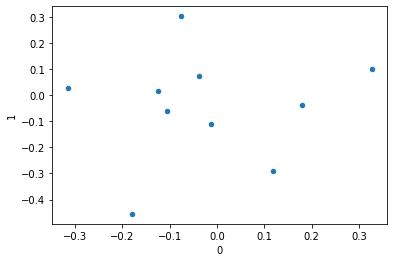

In [6]:
%matplotlib inline

display(ca.row_coordinates(df2))
ca.row_coordinates(df2).plot.scatter(0, 1);

A partir de la gráfica anterior se ve ina gran separación entre estas componentes.

En la parte anterior se visualizaron las filas, a continuación visualizaremos las columnas de este nuevo espacio.

,0,1
A,-0.478124,0.072279
B,-0.127251,0.173388
C,-0.082502,0.049822
D,0.390445,0.139290
E,0.031911,-0.292160


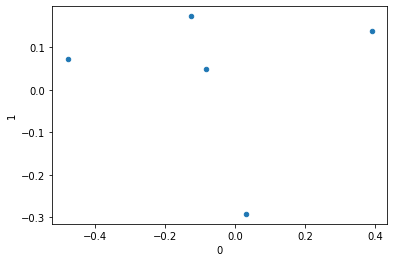

In [7]:
display(ca.column_coordinates(df2))
ca.column_coordinates(df2).plot.scatter(0, 1);

Nuevamente, se ve una gran separación entre las componentes.

Además, podemos visualizar tanto las filas como las columnas juntas, así:

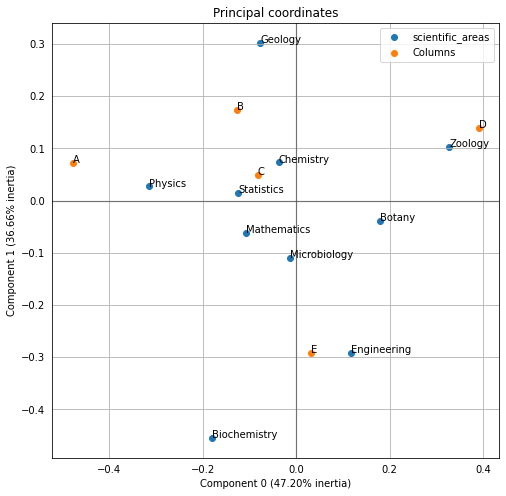

In [8]:
ca.plot_coordinates(df2, figsize=(8, 8));

Veamos algunas métricas:

In [10]:
print('Eigen values: ', ca.eigenvalues_)
print('Inercia total: ', ca.total_inertia_)
print('Inercia explicada: ', ca.explained_inertia_)

Eigen values:  [0.039116521837875305, 0.030380805443940125]
Inercia total:  0.08287877841175875
Inercia explicada:  [0.47197271228512094, 0.36656917519949506]


[3] Realice un pipeline que involucre MCA y un clasificador (regresion logística, LDA, etc.) y realice la validación cruzada usando sólo las variables categóricas (`df`) del dataset del Titanic.

In [12]:
#Importando el dataset del Titanic
data = sns.load_dataset('titanic').dropna(subset=['age'])
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Creamos nuestro dataframe con las variables categóricas, y creamos una instancia de MCA con dos componentes, y la entrenamos con el dataframe creado.

In [19]:
df3 = data[['sex', 'embarked', 'class']]

mca = prince.MCA(n_components=2)
mca.fit(df3)

MCA()

Visualizamos la estructura de los loadings.

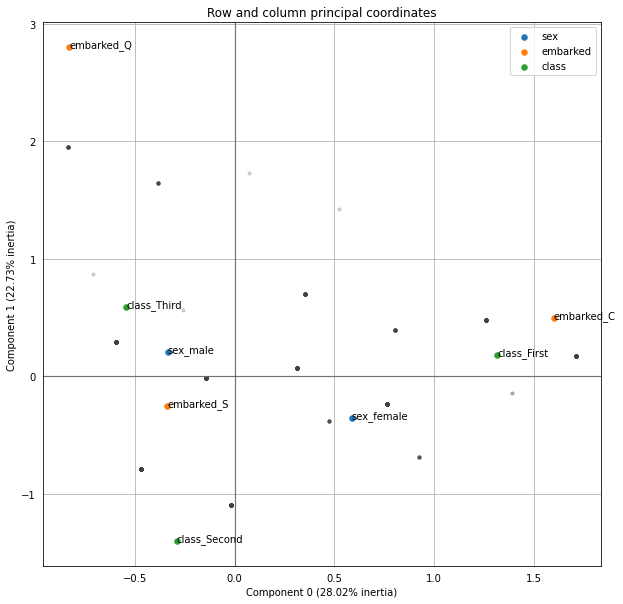

In [20]:
mca.plot_coordinates(df3,
                     row_points_alpha=.2,
                     figsize=(10, 10),
                     show_column_labels=True
                    );

Creamos una instancia de mca y lo transformamos con el dataframe.

In [22]:
Xs = mca.transform(df3)
Xs

,0,1
0,-0.594207,0.291893
1,1.709759,0.169943
2,-0.143988,-0.013231
3,0.763679,-0.235846
4,-0.594207,0.291893
...,...,...
885,-0.383991,1.643077
886,-0.470912,-0.787732
887,0.763679,-0.235846
889,1.259540,0.475067


Creamos el pipeline del mca con 10 componentes, con regresión logística.

In [24]:
pipe = Pipeline([('mca', prince.MCA(n_components=10)), ('LR', LogisticRegression())])

Los valores de la validación cruzada del anterior modelo son:

In [26]:
cross_val_score(pipe, df3, data.survived.values)

array([0.72027972, 0.8041958 , 0.75524476, 0.72727273, 0.79577465])

[4] Usando un pipeline similar al anterior encuentre el mejor número de componentes principales usando MCA y validación cruzada (puede usar GridSearchCV). Compruebe el mejor modelo en un test set independiente.

Tomamos X como los datos menos la columna `survived`, y y como esta columna

In [27]:
X = data.drop('survived', axis=1)
y = data['survived']

Dividimos las variables numéricas y las categóricas, y creamos un nuevo dataset, donde las categóricas las convertimos a tipo `category`.

In [29]:
variables_numericas = ["age", "fare"]
variables_categoricas = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
data2 = pd.concat([data[variables_numericas],data[variables_categoricas].astype('category', copy=True)],axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          714 non-null    float64 
 1   fare         714 non-null    float64 
 2   sex          714 non-null    category
 3   embarked     712 non-null    category
 4   class        714 non-null    category
 5   who          714 non-null    category
 6   adult_male   714 non-null    category
 7   deck         184 non-null    category
 8   embark_town  712 non-null    category
 9   alive        714 non-null    category
 10  alone        714 non-null    category
dtypes: category(9), float64(2)
memory usage: 24.4 KB


Para el pipline, definimos una instancia de mca con 10 componentes, con regresión logística, como antes. Le metemos un diccionario de parámetros que está compuesto por el número de componentes de mca, que va de 1 a 10. Hacemos validación cruzada con 8 folds.

In [36]:
pipe_mca = Pipeline(
    steps=[('mca', prince.MCA(n_components = 10)), ('LR', LogisticRegression())]
)

grid_search = GridSearchCV(pipe_mca, param_grid={'mca__n_components': range(1,10)}, cv=8)

grid_search.fit(data2, data.survived)

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('mca', MCA(n_components=10)),
                                       ('LR', LogisticRegression())]),
             param_grid={'mca__n_components': range(1, 10)})

In [37]:
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_mca__n_components',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

[5] Use `sklearn.compose.ColumnTransformer`(ver [este ejemplo](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py)) para realizar PCA sobre las variables numéricas y MCA para las variables categóricas. Incluya este tratamiento en un pipeline junto con un clasificador y compruebe el desempeño del resultado mediante validación cruzada.

Definimos las variables numéricas y el pipeline para transformarlo, con PCA con dos componentes 

In [51]:
variables_numericas = ["age", "fare"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler()), ('pca', PCA(n_components=2))]
)

Definimos las variables categóricas y una instancia de MCA con 8 componentes

In [52]:
variables_categoricas = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
categorical_transformer = prince.MCA(n_components = 8)

Creamos el transformador con `ColumnTransformer`

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, variables_numericas),
        ("cat", categorical_transformer, variables_categoricas),
    ]
)

Creamos el PipeLine de predicción con regresión logística

In [54]:
clasi = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

Calculamos los valores de la validación cruzada

In [55]:
cross_val_score(clasi, data2, data.survived)

array([0.86013986, 0.90909091, 0.85314685, 0.86713287, 0.92957746])

Y su media

In [56]:
cross_val_score(clasi, data2, data.survived).mean()

0.8838175908598445

[6] Ahora realice un procedimiento combinando los procesos de [3] y [2]. Es decir, realice un tratamiento de variables según el tipo, construya un pipeline combinando PCA, MCA y un clasificador, y encuentre el mejor número de componentes principales tanto para PCA cómo para MCA (usando GridSearchCV). Compruebe el resultado en un test set.

Definimos las variables numéricas y definimos el PipeLine de transformación con PCA. Y hacemos lo mismo para las categóricas, pero con MCA.

In [57]:
variables_numericas = ["age", "fare"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler()), ('pca', PCA())]
)

variables_categoricas = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
categorical_transformer = prince.MCA()

Creamos el transformador con `ColumnTransformer`.

In [58]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, variables_numericas),
        ("cat", categorical_transformer, variables_categoricas),
    ]
)

Creamos el PipeLine del clasificador, con regresión logística.

In [59]:
clasi2 = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

Definimos un diccionario de parámetros con número de componentes para las componentes de MCA, que va de 1 a 10, y para PCA, que puede ser 1 o 2. Hacemos validación cruzada con `GridSearchCV`, con 10 folds. 

In [69]:
param_grid = {'preprocessor__cat__n_components': range(1,10),
               'preprocessor__num__pca__n_components':[1,2]}

model = GridSearchCV(clasi2,param_grid=param_grid, cv=10)

In [68]:
clasi2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__scaler', 'preprocessor__num__pca', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__imputer__verbose', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__with_mean', 'preprocessor__num__scaler__with_std', 'preprocessor__num__pca__copy', 'preprocessor__num__pca__iterated_power', 'preprocessor__num__pca__n_components', 'preprocessor__num__pca__random_state', 'preprocessor__num__pc

Ajustamos el modelo con los datos.

In [70]:
model.fit(data2, data.survived)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA())]),
                                                                         ['age',
                                                                          'fare']),
                                               